<a href="https://colab.research.google.com/github/hamagami/anomaly-detection/blob/main/PyOD%E7%95%B0%E5%B8%B8%E6%A4%9C%E7%9F%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193258 sha256=47150f64db2e79f0f873f5b1e0ef0656944967766cae88b107ed496c16a82275
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [4]:
# データの生成
contamination = 0.1  # 異常値の割合
n_train = 200  # 訓練データのサンプル数
n_test = 100  # テストデータのサンプル数

# 正常データと異常データを含むサンプルデータを生成
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, n_test=n_test, n_features=2, contamination=contamination, random_state=42
)

# モデルの定義
models = {
    "KNN": KNN(contamination=contamination),
    "Isolation Forest": IForest(contamination=contamination),
    "AutoEncoder": AutoEncoder(contamination=contamination, batch_size=10)
}


KNN Model Evaluation:
KNN ROC:1.0, precision @ rank n:1.0
Isolation Forest Model Evaluation:
Isolation Forest ROC:1.0, precision @ rank n:1.0


Training: 100%|██████████| 10/10 [00:00<00:00, 11.95it/s]


AutoEncoder Model Evaluation:
AutoEncoder ROC:0.8911, precision @ rank n:0.6


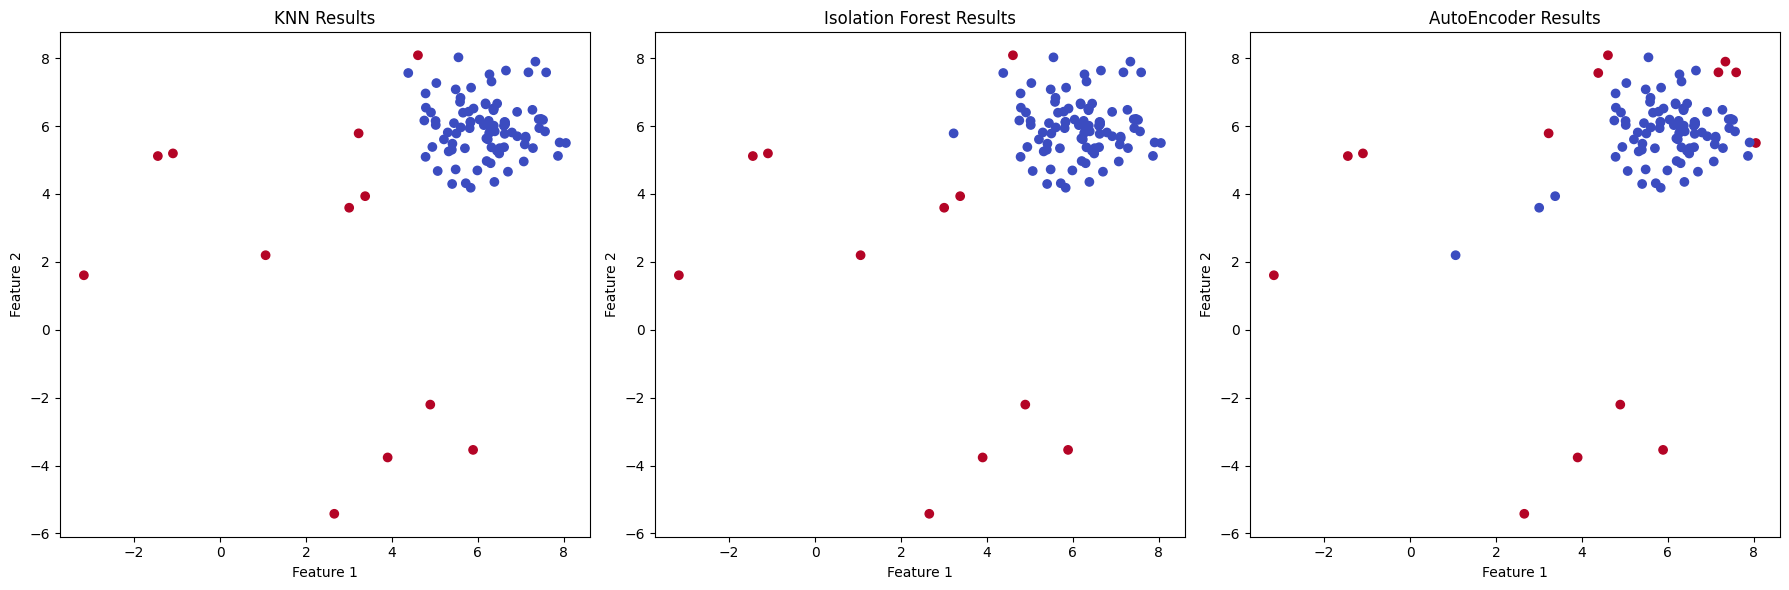

In [6]:
# 各モデルで異常検知を実行
plt.figure(figsize=(18, 6))
for i, (model_name, model) in enumerate(models.items(), 1):
    model.fit(X_train)

    # 訓練データとテストデータに対する予測
    y_train_pred = model.labels_  # 訓練データに対する予測ラベル
    y_test_pred = model.predict(X_test)  # テストデータに対する予測ラベル
    y_test_scores = model.decision_function(X_test)  # 異常スコア

    # モデルの評価結果を表示
    print(f"{model_name} Model Evaluation:")
    evaluate_print(model_name, y_test, y_test_scores)


    # 結果のプロット
    plt.subplot(1, 3, i)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm')
    plt.title(f'{model_name} Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()